# [Lab Session 4](deconvolution.ipynb)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

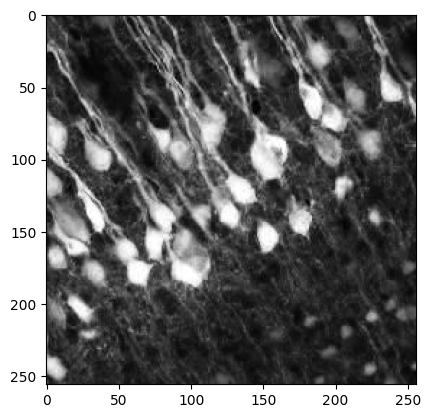

In [2]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

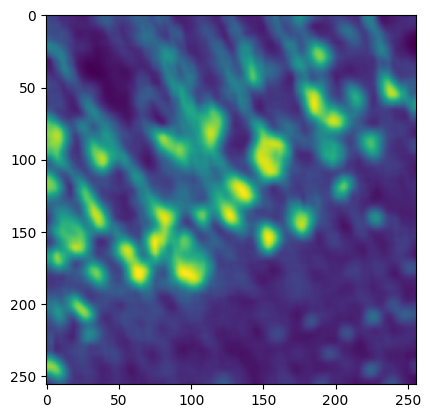

In [3]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2
psf_applied = conv(img, psf, mode='same',boundary='symm') 
plt.imshow(psf_applied)

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

In [4]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)




Apply the second psf to the image:

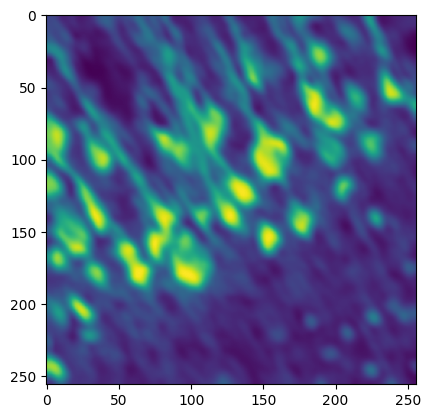

In [5]:
psfGF = create_psf(10)
psf_appl_GF = conv(img, psfGF, mode='same',boundary='symm') 
plt.imshow(psf_appl_GF)

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [ ]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    flip_psf = np.flip(psf)
    for t in range (n_iterations):
        # Formula
        conv_one = image/ (conv(img_deconv, psf, mode = 'same', boundary = 'symm'))
        corrected = (conv(conv_one, flip_psf, mode = 'same', boundary = 'symm'))  
        img_deconv *= corrected  
    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

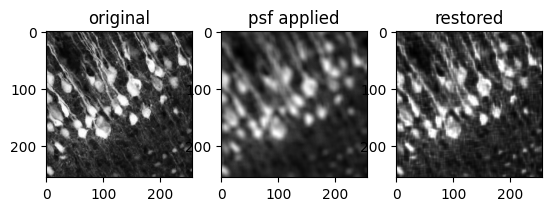

In [7]:
rl_restored = richardson_lucy_deconvolution(psf_applied, psf, 100)

plt.subplot(1,3,1)
plt.title('original')
plt.imshow(img, cmap = 'gray')

plt.subplot(1,3,2)
plt.title('psf applied')
plt.imshow(psf_applied, cmap = 'gray')

plt.subplot(1,3,3)
plt.title('restored')
plt.imshow(rl_restored, cmap = 'gray')

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

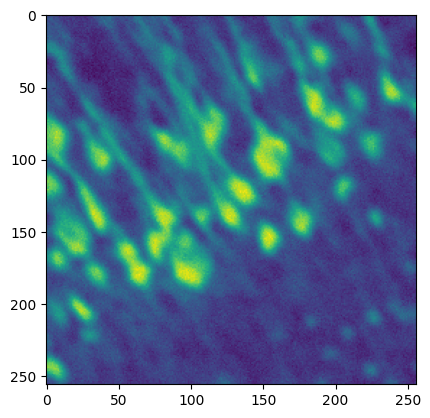

In [9]:
noise = (np.random.normal(loc=5,size=img.shape))
reduce_factor = 50
noise = noise / reduce_factor

psf_GF_noise = psf_appl_GF + noise
psf_GF_noise_clipped = psf_GF_noise.clip(0,1)
plt.imshow(psf_GF_noise_clipped)



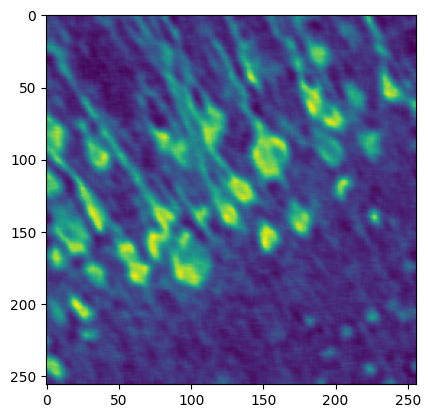

In [10]:
noise_restored = richardson_lucy_deconvolution(psf_GF_noise_clipped, psfGF, 20)
plt.imshow(noise_restored)

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

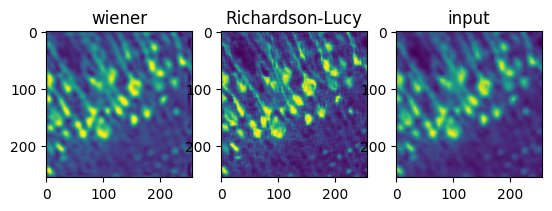

In [45]:
wiener_deconvolved =  wiener(psf_applied, psf, balance=2, clip=True)


plt.subplot(1,3,1)
plt.title('wiener')
plt.imshow(wiener_deconvolved)

plt.subplot(1,3,2)
plt.title('Richardson-Lucy')
plt.imshow(rl_restored)

plt.subplot(1,3,3)
plt.title('input')
plt.imshow(psf_applied)

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

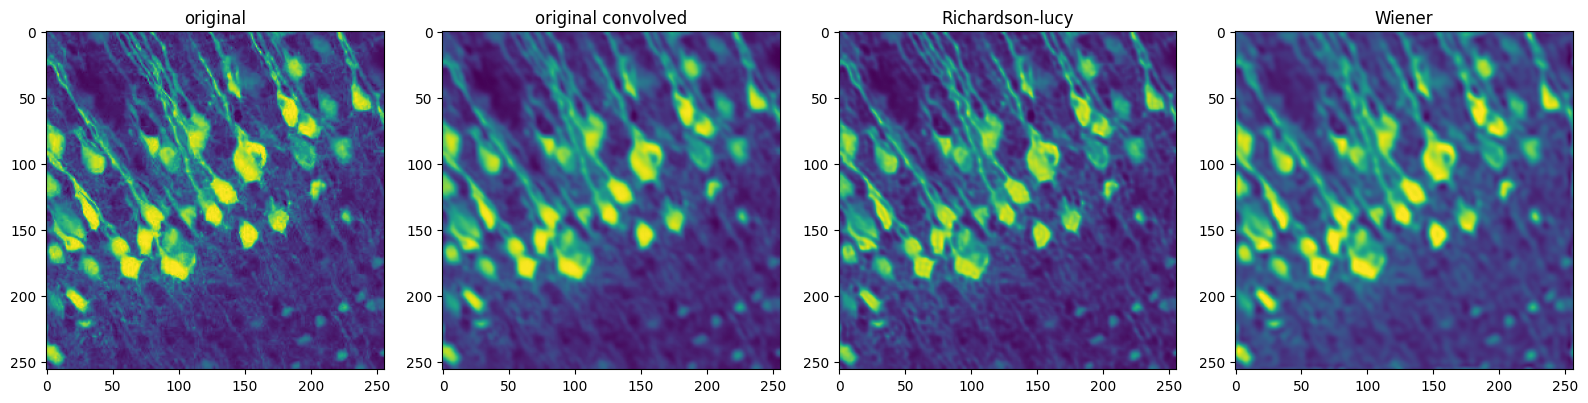

In [38]:
# Defining smaller value
psfGF_small = create_psf(5)
psf_appl_GF_small = conv(img, psfGF_small, mode='same',boundary='symm') 

# restoring richardson-lucy
rl_restored_small = richardson_lucy_deconvolution(psf_appl_GF_small, psfGF_small, 20)

# restoring wiener
wiener_deconvolved_small =  wiener(psf_appl_GF_small, psfGF_small, balance=0.1, clip=True)

plt.figure(figsize=(16, 4))

plt.subplot(1,4,1)
plt.title('original')
plt.imshow(img)

plt.subplot(1,4,2)
plt.title('original convolved')
plt.imshow(psf_appl_GF_small)

plt.subplot(1,4,3)
plt.title('Richardson-lucy')
plt.imshow(rl_restored_small)

plt.subplot(1,4,4)
plt.title('Wiener')
plt.imshow(wiener_deconvolved_small)

plt.tight_layout()
plt.show()

**[Task 8.]()** Use a wrong PSF to restore the image

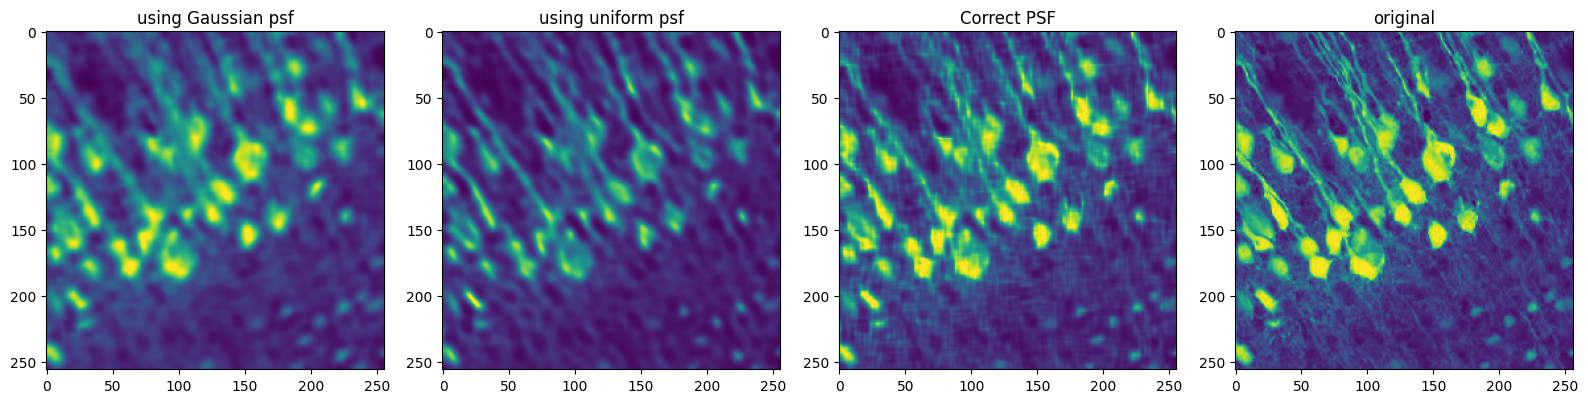

In [44]:
rl_restored_f_GF = richardson_lucy_deconvolution(psf_applied, psfGF, 20)
rl_restored_f_U = richardson_lucy_deconvolution(psf_appl_GF, psf, 20)


plt.figure(figsize=(16, 4))

plt.subplot(1,4,1)
plt.title('using Gaussian psf')
plt.imshow(rl_restored_f_GF)

plt.subplot(1,4,2)
plt.title('using uniform psf')
plt.imshow(rl_restored_f_U)

plt.subplot(1,4,3)
plt.title('Correct PSF')
plt.imshow(rl_restored)

plt.subplot(1,4,4)
plt.title('original')
plt.imshow(img)

plt.tight_layout()
plt.show()